In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
linear_x = np.array([
    [2104,5,1,45]
    ,[1416,3,2,40]
    ,[852,2,1,35]
    ])

linear_y = np.array([460,232,178])

In [4]:
class_x = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
class_y = np.array([0,0,0,1,1,1]) 


# Linear Regression

![Linear Regression.png](<attachment:Linear Regression.png>)
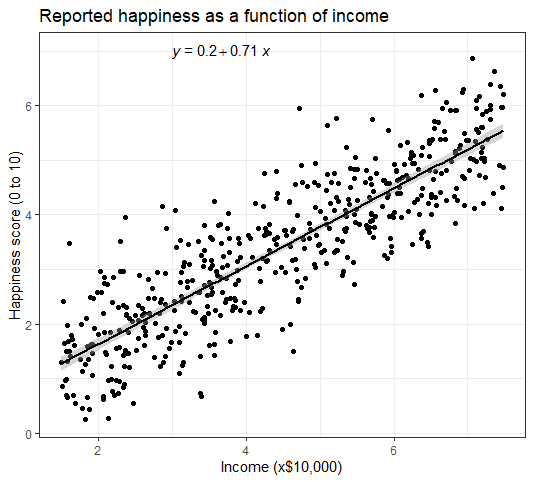

## Cost Function

*** 
$$
j_{(w,b)} = \frac{1}{2m}  \sum \limits_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^{2})
$$

$$ f_{w,b}(x) = (w*x)+b$$
***



In [5]:
def compute_cost(x,y,w,b):
    cost=0.0
    m = x.shape[0]
    for i in range(m):
        f_wb= np.dot(x[i],w)+b
        cost+=(f_wb - y[i])**2
        
    total_cost = cost /(2*m)
    return total_cost

## Gradient Descent
***
repeat until convergence{
$$
w = w - \alpha\frac{d}{dw} (J_{(w,b)})
$$
$$
b = b- \alpha\frac{d}{db} (J_{(w,b)})
$$


}


$$ 
\frac{d}{dw} (j_{(w,b)}) = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)}) x^{(i)}
$$
$$
\frac{d}{db} (j_{(w,b)}) = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})
$$
***

In [6]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    
    dj_dw =np.zeros((n,))
    dj_db=0.0
    for i in range(m):
        err = (np.dot(x[i],w) +b) - y[i]
        dj_db += err 
        for j in range(n):
            dj_dw[j] += err  * x[i,j]
            
    dj_dw /= m
    dj_db /= m
    return dj_dw,dj_db
    

In [7]:
def gradient_descent(x,y,alpha = 5.0e-7,iteration = 1000,w=None,b=0.):
    if w is None:
        w=np.zeros(x.shape[1])
    for i in range(iteration):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w-=alpha * dj_dw
        b-= alpha * dj_db
        
    return w,b
        

In [8]:
def linear(x,y):
    """ 
    x : 2d arr
    y : arr
    
    return w: arr
           b: int
    """
    w,b = gradient_descent(x,y)
        
    return w,b

In [9]:
def predict(x,w,b):
   
    y = np.dot(x , w) + b
        
    return y

### Test

In [10]:
w_linear ,b_linear =linear(linear_x,linear_y)
y_hat = predict(linear_x,w_linear,b_linear)
print(y_hat)
print(linear_y)
from sklearn.metrics import r2_score
print(r2_score(linear_y,y_hat)*100)

[426.18530497 286.16747201 171.46763087]
[460 232 178]
90.8047213220873


### Scikit-Learn

In [11]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(linear_x,linear_y)
y_hat_sklearn = linear_model.predict(linear_x)
print(y_hat_sklearn)
print(r2_score(linear_y,y_hat_sklearn)*100)

[460. 232. 178.]
100.0


***
***
# Polynomial Regression


![Polynomial Regression.png](<attachment:Polynomial Regression.png>)
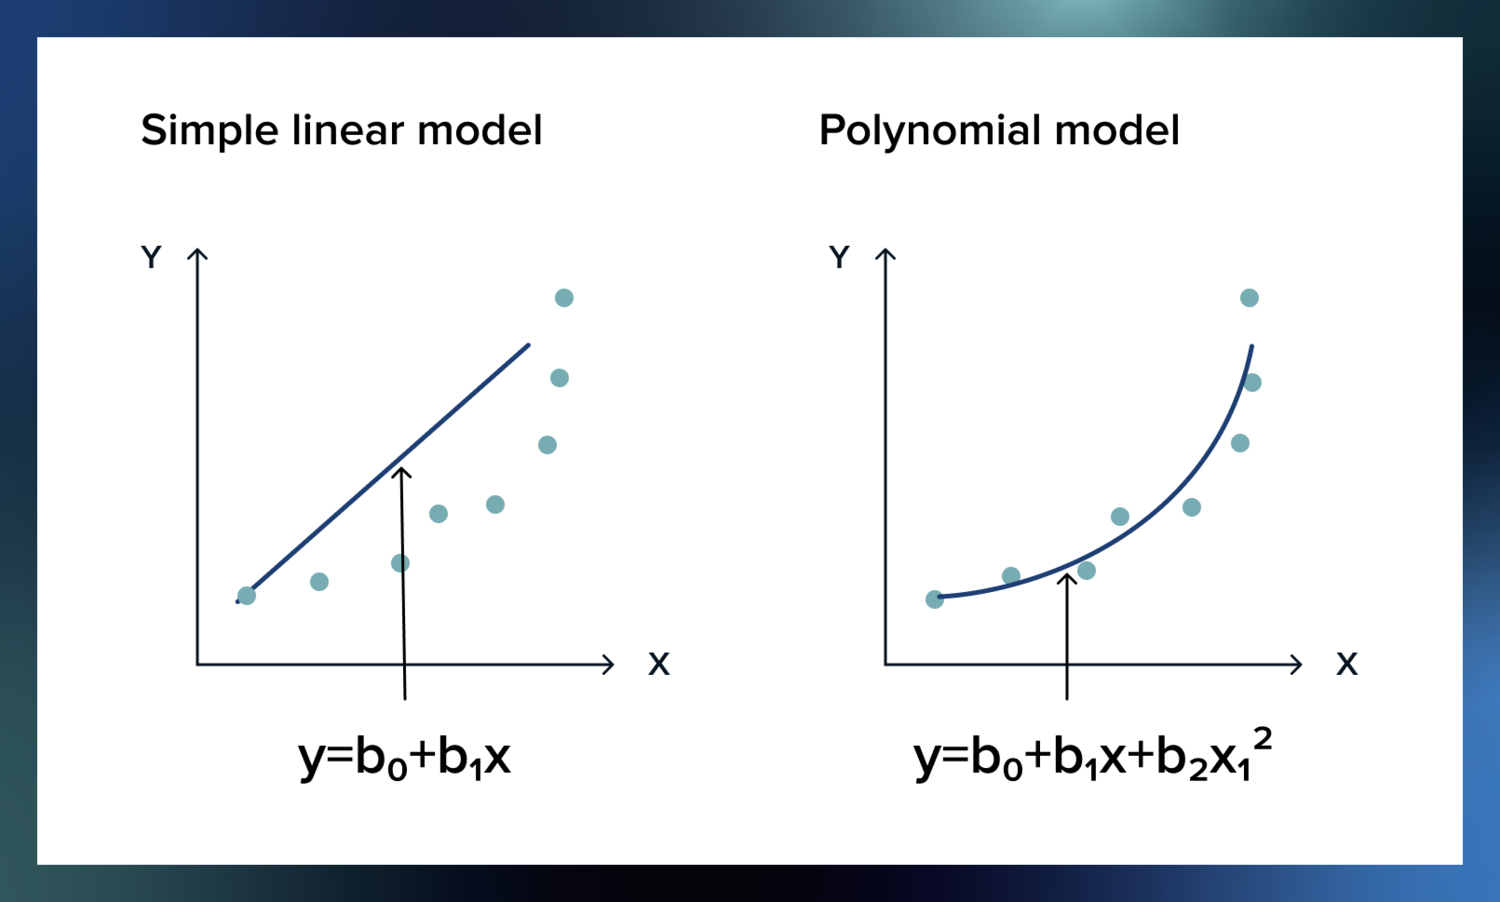

In [19]:
from sklearn.preprocessing import PolynomialFeatures

pfr = PolynomialFeatures(degree=4)
x_poly = pfr.fit_transform(linear_x)

lr = LinearRegression()
lr.fit(x_poly , linear_y)

p_y_hat = lr.predict(x_poly)
print(r2_score(linear_y,p_y_hat)*100)

100.0


****
***

# Logistic Regression

![Logistic Regression.png](<attachment:Logistic Regression.png>) 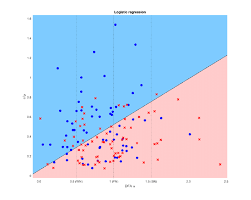

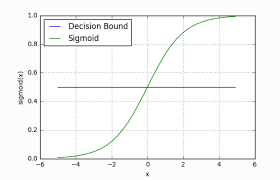

## Cost Function

***
$$
j_{(\vec{w},b)} = \frac{-1}{m} \sum\limits_{i=1}^{m}[y^{(i)} \cdot log(f_{\vec{w},b}(\vec{x^{(i)}})) + (1 - y^{(i)}) \cdot log (1 - f_{\vec{w},b}(\vec{x^{(i)}}))]
$$
$$
f_{(\vec{w},b)}(\vec{x})=g(z)=\frac{1}{1+e^{-({{\vec{w} \cdot \vec{x} +b}})}}
$$
***

In [11]:
def sigmoid(f_wb):
    z = 1/(1+ np.exp(-f_wb))
    return z

In [12]:
def compute_cost_logistic(x,y,w,b):
    m = x.shape[0]
    cost =0.0
    for i in range(m):
        z_i=np.dot(x[i],w)+b
        f_wb = sigmoid(z_i)
        cost+= -y[i]*np.log(f_wb) - (1-y[i]) * np.log(1-f_wb)
    total_cost = cost /m
    return total_cost


## Gradient Descent
***
repeat{
$$
w_{j} = w_{j} - \alpha \cdot \frac{d}{dw^{(j)} }(j_{(\vec{w},b)})
$$
$$
b = b -\alpha \cdot \frac{d}{db}(j_{(\vec{w},b)})
$$
}

$$
\frac{d}{dw_{j}} j(\vec{w},b) = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{(\vec{w},b)}(\vec{x^{(i)}}) - y^{(i)} ) x_{j}^{(i)}
$$
$$
\frac{d}{db}j_{(\vec{w},b)} = \frac{1}{m} \sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x^{(i)}}) - y^{(i)})
$$
***

In [13]:
def compute_gradient_logistic(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db =0.
    for i in range(m):
        z_i = np.dot(x[i],w) +b
        f_wb = sigmoid(z_i)
        err = f_wb - y[i]
        dj_db += err
        for j in range(n):
            dj_dw[j] += err * x[i,j]
    dj_dw /=m
    dj_db /=m
    return dj_dw,dj_db

In [14]:
def Gradient_descent_logistic(x,y,w = None,b=0.,iterations = 1000,alpha = 0.1):
    if w == None:
        w = np.zeros(x.shape[1])
        
    for i in range(iterations):
        dj_dw,dj_db = compute_gradient_logistic(x,y,w,b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w,b

In [15]:
def logistic(x,y):
    w ,b =Gradient_descent_logistic(x,y)
    return w,b

In [16]:
def predict_logistic(x,w,b):
    y = sigmoid(np.dot(x,w)+b)
    for i in range(len(y)) :
        if y[i] < 0.5:
            y[i]  =0
        else :
            y[i]  = 1
    return y

### Test


In [17]:
w_logistic ,b_logistic = logistic(class_x,class_y)
y_logistic_hat = predict_logistic(class_x,w_logistic,b_logistic)
print(y_logistic_hat)
from sklearn.metrics import accuracy_score
print(accuracy_score(class_y,y_logistic_hat)*100)

[0. 0. 0. 1. 1. 1.]
100.0


## Linear Regression With Regularized

*** 
The Cost Function Will Be:
$$ 
j_{(\vec{w},b)} = \frac{1}{2m}\sum \limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^{2} + \frac{\lambda}{2m}\sum \limits_{j=1}^{n}w^{2}_{j}
$$
***

## Scikit-Learn

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(class_x,class_y)
y_logistic_hat_sklearn = logistic_model.predict(class_x)
print(accuracy_score(class_y,y_logistic_hat_sklearn)*100)

100.0


***
***